# DBSCAN clustering

K-means clustering은 초기 중심으로 설정한 값에 크게 영향을 받고 
노이즈와 이상치에 민감하다는 단점을 가짐 
그리고 군집의 개수 K를 설정하는 것도 쉽지 않다는 단점이 있음
이러한 단점을 상대적으로 극복한 것이 DBSCAN clustering


DBSCAN은 Density-based Spatial Clustering of Applications with Noise의 줄임말로 
2014년 KDD 학회에서 상을 받은 군집분석 알고리즘
그리고 Density-based clustering 중에서 가장 유명하고 성능이 우수함



DBSCAN의 가장 대표적인 특징은 eps-neighbors와 MinPts를 사용하여 군집을 구성한다는 것
- Eps-neighbors는 한 데이터를 중심으로 epsilon 거리 이내에 데이터를 한 군집으로 구성한다고 명시하는 parameter
- MinPts는 한 군집은 MinPts보다 많거나 같은 수의 데이터로 구성된다는 것

쉽게말해 반지름(eps)과 최소갯수(MinPts)가 주어지면 그 반지름 안에 해당 최소갯수만큼 있는 이웃을 확장해 나가는 군집 알고리즘이다.

만약 MinPts보다 적은 수의 데이터가 eps-neighbors를 형성하면 noise로 취급을 한다. 
즉, 군집은 최소한의 일정 데이터수를 유지해야한다는 것이다. 

1. 사용자는 eps와 minPoints를 parameter로 지정  
    - 군집이 형성될 개수K를 parameter로 설정하지 않는 것  
2. 그리고 eps를 반지름하는 원 안에 있는 관측치를 찾음   
3. 찾으면 그 관측치를 군집내 포함시키고, 해당 관측치를 기준으로 다시 관측치를 찾아나감  
    - 이 군집이 최소한의 관측치 개수 minPoints를 넘기면 군집으로 인정되는 것  
    - 그리고 연결되지 않은 관측치들은 이상치로 분류

![010-1](https://user-images.githubusercontent.com/63298243/119341221-78beff00-bcce-11eb-9fdb-e71f1f45b6a0.png)

#### 장점
- 원형이 아닌 데이터들의 군집을 잘 분류해내고, 이상치에 반응을 하지 않는다는 것
- K-means/medoids처럼 군집의 수를 설정할 필요가 없음

#### 단점
- 하나의 데이터는 한 군집에 속해야 하는데, 이는 시작점에 따라 다른 군집으로 형성될 가능성이 존재
- Eps의 크기에 의해 DBSCAN의 성능이 크게 좌우됨
- eps를 기준으로 하기에 군집별로 밀도가 다를 경우 DBSCAN은 군집화를 제대로 수행하지 못할 가능성이 큼

## Import lib & data

In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns=['Sepal length','Sepal width','Petal length','Petal width']

## EDA

데이터 형태, 결측치 등을 확인

In [4]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
dtype: int64

## Modeling

#### 정규화 필요

#### DBSCAN 예시
DBSCAN(eps=0.5,min_samples=5)

#### 파라미터 설명

1. Minpoints
    - Minpoints는 가장 기본적으로는 변수의 수 + 1로 이루어짐
    - 그리고 최소한 3이상으로 설정할 필요가 있음
2. Eps
    - Eps설정의 경우에는 eps가 너무 작을경우 상당 수의 데이터가 노이즈로 구분되어 무시될 수 있음
    - 반면, 너무 클 경우는 모든 데이터가 하나의 군집으로 될 수도 있음

In [8]:
X = df

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
dbs = DBSCAN(eps=0.5,min_samples=5)

In [11]:
dbs.fit(X)

DBSCAN()

In [12]:
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [13]:
label = dbs.labels_

In [14]:
df['Cluster'] = label
df

,Sepal length,Sepal width,Petal length,Petal width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,-1


## 시각화

능력껏 해보시죠!!!  

sns.pairplot 이라는것을 이용해봐도 됩니다 (예-전에 배웠습니다 :)

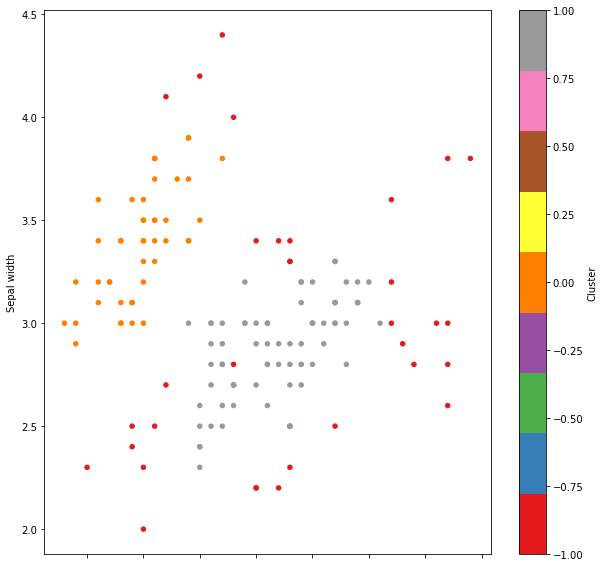

In [15]:
df.plot(kind='scatter', x='Sepal length', y='Sepal width', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

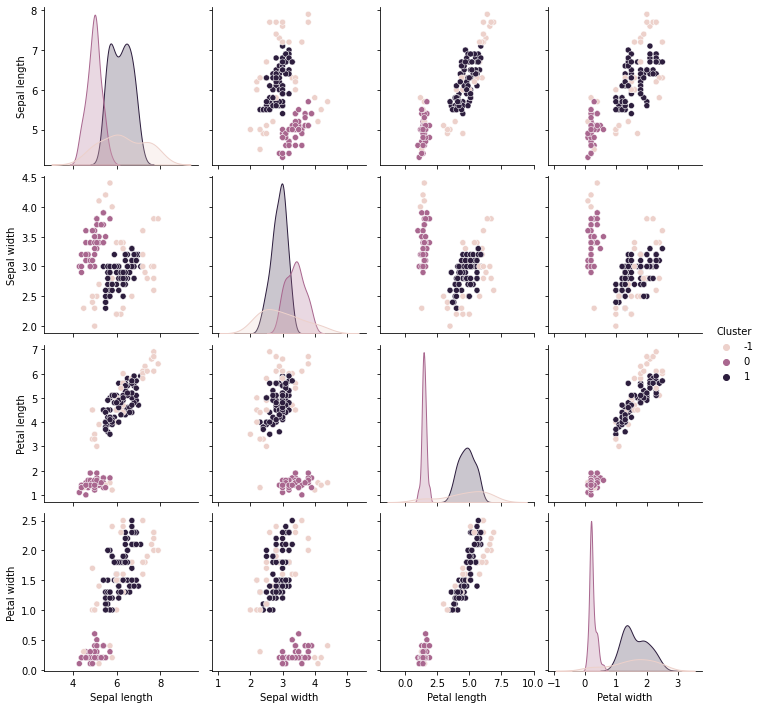

In [16]:
sns.pairplot(df,hue='Cluster')
plt.show()